In [78]:
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random as r
import time
import numpy as np
class network:
    def __init__(self,s):
        self.size=s #size of network
        self.g1=nx.barabasi_albert_graph(s,6) #s nodes each of degree 6
        #self.g1.to_undirected()
        self.beta=0.5
        self.lamb=0.9 #probability of generation at each node
        #self.mean=3
        self.queue=defaultdict(list)#queue at each node.Each key in this dict is associated with a list of tuples
        #like (serial no of run, destination node)
        self.packets=0 #no of packets in the network
        self.centralities=nx.betweenness_centrality(self.g1)#dictionary of centralities of the network
        self.linkbw=0 #link bandwidth
        self.counter=0 #serial no of run
        self.node_bw=[]
    def sendPacket(self,source,dest):#sends packet one step towards the destination
        path=nx.shortest_path(self.g1,source,dest) #shortest path from source to destination
        if len(path)>1:#if such a path exists
            if(dest==path[1]): #if the destination is the next in the path
                self.packets-=1 #packet delivered so no of packets in the node is decreased by one 
            else:
                self.queue[path[1]].insert(0,(self.counter,dest)) # otherwise inserts the packet into the queue 
                #of the next node in the path
    def simulate(self): #generates packets and routes the existing packets towards their dest.
        for i in range(self.size): #routes from the queues first... guess why?
                    c=self.node_bw[i] #calculate the processing capacity of node i
                    pass_on=c
                    prob=pass_on-int(pass_on) #calculate probabilty that the last packet is sent 
                    pass_on=int(pass_on) #no of packets which would certainly be sent
                    #popped from one queue ..sent to next
                    oho=self.queue[i] 
                    #print(len(oho))
                    for k in range(pass_on):
                        z=len(oho)
                        #print(z)
                        if(z!=0):
                            if(self.counter!=oho[z-1][0]): #important to ensure that the same packet
                                # does not move more than one step in a run
                                x=oho.pop() 
                                self.sendPacket(i,x[1])
                    z=len(oho)
                    if(z!=0):
                        if(r.random()<prob):
                            if(self.counter!=oho[z-1][0]):
                                x=oho.pop()
                                self.sendPacket(i,x[1])
                        self.queue[i]=oho
        for i in range(self.size): #genearates packets
            if(r.random()<self.lamb):
                self.packets+=1
                j=r.randrange(0,self.size)
                if i==j:
                    if j!=0:
                        j-=1
                    else:
                        j+=1
                self.sendPacket(i,j)
        """for i in range(self.size): #genearates packets
            self.lamb=0
            while(self.lamb==0):
                self.lamb=np.random.poisson(self.mean)
            #print("Lambda =",self.lamb)
            j=r.randrange(0,self.size)
            for k in range(self.lamb):
                    self.packets+=1
                    self.sendPacket(i,j)"""
        self.counter+=1
def frange(start, stop, step): #yields fractional numbers in steps to caller
    i = start
    while i < stop:
        yield i
        i += step
            

    



In [79]:
s=100
n=network(s)
mcn=0
hc=0
bw=[]
it=[]
for no in n.g1.nodes():
    if(n.centralities[no]>hc):
        hc=n.centralities[no]
        mcn=no



In [80]:
Kp=0.002
Kd=0.5
it=[]
bw=[]
le=[]
n.node_bw=[]
for i in range(s):
    n.node_bw.append(0)
lerror=[0]*n.size
for i in range(1000):
    n.simulate()
    count=0
    for j in n.g1.nodes():
        uerror=len(n.queue[j])
        #lerror=0-len(n.queue[j])
        if(uerror>0):
            count+=1
            n.node_bw[j]+=Kp*uerror
        lerror[j]=uerror
    le.append(len(n.queue[mcn]))
    it.append(i)
    bw.append(n.node_bw[mcn])
    #print(i," ",count)
sum=0
last_packets=0
n.queue=defaultdict(list)
n.packets=0
for i in range(1000):
    n.simulate()
    if(i>500):
        diff=n.packets-last_packets
        sum+=diff
    last_packets=n.packets
mean_change=sum/500
order_param=mean_change/n.lamb


-0.011111111111111112
[22.505999999999954, 8.687999999999892, 21.802000000000028, 10.379999999999903, 10.985999999999912, 11.933999999999886, 34.66399999999986, 35.19799999999983, 21.083999999999968, 8.535999999999893, 22.498000000000044, 20.70599999999997, 6.803999999999852, 18.079999999999938, 1.0000000000000007, 3.7439999999999087, 8.291999999999875, 3.5759999999999295, 3.395999999999924, 0.8000000000000006, 6.769999999999866, 2.0719999999999987, 7.383999999999855, 1.256000000000001, 2.0739999999999954, 2.189999999999988, 1.328000000000001, 0.9000000000000007, 0.9140000000000006, 2.2679999999999834, 2.4119999999999755, 1.2460000000000009, 4.519999999999887, 3.425999999999922, 13.36999999999986, 5.363999999999869, 4.905999999999879, 8.82399999999988, 7.529999999999848, 6.927999999999849, 1.1000000000000008, 1.316000000000001, 0.6680000000000005, 1.0600000000000007, 0, 1.5240000000000011, 0.23200000000000018, 1.7300000000000013, 2.587999999999968, 1.0280000000000007, 1.234000000000000

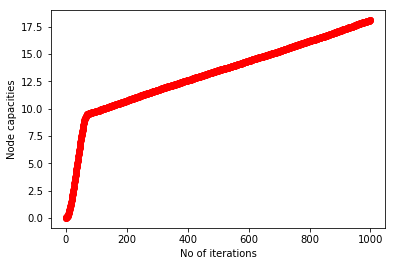

In [81]:
print(order_param)
print(n.node_bw)
print(n.centralities)
plt.plot(it,bw,"ro")

plt.xlabel('No of iterations')
plt.ylabel('Node capacities')
plt.savefig('skpn.jpeg',dpi=900)
plt.show()

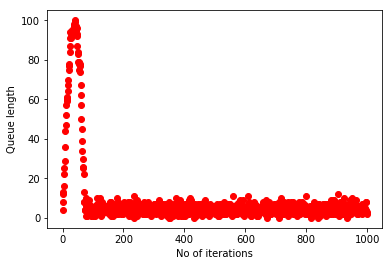

In [82]:
plt.plot(it,le,"ro")

plt.xlabel('No of iterations')
plt.ylabel('Queue length')
plt.savefig('skpq.jpeg',dpi=900)
plt.show()

4.07801999999997


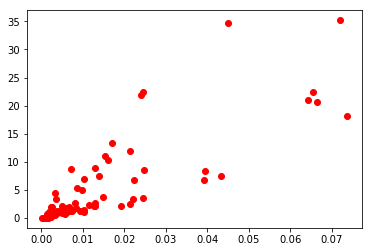

In [83]:
cen=[]
for i in range(s):
    cen.append(n.centralities[i])
sum=0
for i in range(s):
    sum+=n.node_bw[i]
avg=sum/s
print(avg)
plt.plot(cen,n.node_bw,"ro")
plt.show()

In [84]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) - c
popt, pcov = curve_fit(func, cen, n.node_bw)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
print(popt)
print(pcov)

In [ ]:
def func1(x,a):
    return (x**2)*a
popt1, pcov1 = curve_fit(func1, cen, n.node_bw)
print(popt1)
print(pcov1)

In [ ]:
import matplotlib.pyplot as plt
y=[]
for i in range(s):
    y.append(func(n.centralities[i],popt[0],popt[1],popt[2]))
plt.plot(cen,y,"ro")
plt.show()

In [ ]:
n.node_bw=y

In [ ]:
n.packets=0
n.queue=defaultdict(list)
sum=0
last_packets=0
for i in range(1000):
    n.simulate()
    if(i>500):
        diff=n.packets-last_packets
        sum+=diff
    last_packets=n.packets
mean_change=sum/500
order_param=mean_change/n.lamb
print(order_param)